In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #binary ise Bernolli veya Gauss kullanılır
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob , Word
from nltk.stem.snowball import SnowballStemmer

from langdetect import detect
%matplotlib inline
import matplotlib.pyplot as plt


from nltk import word_tokenize

from wordcloud import WordCloud
from wordcloud import WordCloud , STOPWORDS


In [48]:
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from nltk.stem.snowball import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB()

from sklearn.naive_bayes import BernoulliNB
b = BernoulliNB()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000000)

In [13]:
df_mane = pd.read_csv("Musical_instruments_reviews.csv")

In [14]:
df_mane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [15]:
df = df_mane[["reviewText","overall"]]

In [16]:
df.head()

,reviewText,overall
0,"Not much to write about here, but it does exac...",5.0
1,The product does exactly as it should and is q...,5.0
2,The primary job of this device is to block the...,5.0
3,Nice windscreen protects my MXL mic and preven...,5.0
4,This pop filter is great. It looks and perform...,5.0


In [17]:
df.dropna(inplace=True)

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10254 entries, 0 to 10260
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  10254 non-null  object 
 1   overall     10254 non-null  float64
dtypes: float64(1), object(1)
memory usage: 240.3+ KB


In [19]:
df["overall"].value_counts()

5.0    6932
4.0    2083
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [20]:
def clean_text(text):
    import re
    import string

    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    return text

clean = lambda x: clean_text(x)
df["processed"] = df['reviewText'].apply(clean) 

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df.loc[df["overall"] < 3, "status"] = "negative"
df.loc[df["overall"] > 3, "status"] = "positive"
df.loc[df["overall"] == 3, "status"] = "neutral"

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='count'>

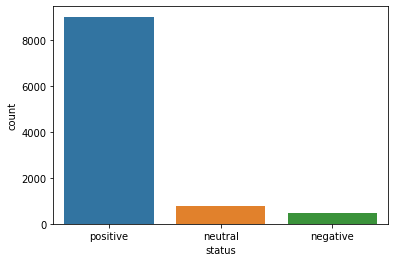

In [23]:
import seaborn as sns
sns.countplot(df["status"])


In [24]:
import nltk 
from nltk import word_tokenize
nltk.download("punkt")

from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oztur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
from unicodedata import normalize
df.processed = df.processed.str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8')


c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
import nltk
from nltk.corpus import stopwords,words
nltk.download('stopwords')
stop_words = stopwords.words("english")
stop_words = [word.replace("\'", "") for word in stop_words] # stop wordleri kaldırdım
df["processed"] = df["processed"].apply(lambda row: " ".join([token for token in row.split(" ") if token not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oztur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
import nltk
from nltk.stem import WordNetLemmatizer

df["processed"] = df["processed"].apply(lambda x : WordNetLemmatizer().lemmatize(x))

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [31]:
df[["polarity" , "subjectivity"]] = df["processed"].apply(lambda x : pd.Series(TextBlob(x).sentiment))

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
df.loc[df["polarity"]>0.2 , "SentimentPolarity"] = "positive"
df.loc[df["polarity"]<-0.2 , "SentimentPolarity"] = "negative"
df["SentimentPolarity"].fillna("neutral" , inplace=True)




c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A valu

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SentimentPolarity', ylabel='count'>

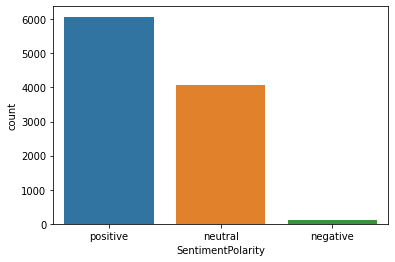

In [35]:
import seaborn as sns
sns.countplot(df["SentimentPolarity"])

In [36]:
df_temp = df.apply(lambda x: True if x["SentimentPolarity"]==x["status"]  else False, axis = 1)

c:\Users\oztur\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

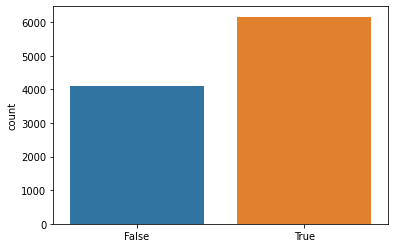

In [37]:
sns.countplot(df_temp)

False değerler polarity ve status(yıldıza göre pozitif negatif olması) karşılaştırır

 Eğer ikisi de aynıysa True değerini gönderirir.

 Yani True değeri  kullanıcının yaptığı yorum ile verdiği yıldız sayısının paralel olduğunu gösterir

# Modelling

In [38]:
stemmer = SnowballStemmer("english")

def lemma(text):
  words = TextBlob(text).words
  return [stemmer.stem(word) for word in words]
# text leri vectorize ettik
vect = CountVectorizer( ngram_range=(1,2), analyzer=lemma)

In [39]:
x = df["processed"] # x ve y değerlerimi belirledim 
y = df["SentimentPolarity"]

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [41]:
x_train_dtm = vect.fit_transform(x_train,y_train) 
x_test_dtm = vect.transform(x_test) 

In [45]:
model_m = m.fit(x_train_dtm,y_train)
predict_m = m.predict(x_test_dtm)
accuracy_score(y_test,predict_m)

0.7535101404056163

In [46]:
model_b = b.fit(x_train_dtm,y_train)
predict_b = b.predict(x_test_dtm)
accuracy_score(y_test,predict_b)

0.6501560062402496

In [49]:
model_lr = lr.fit(x_train_dtm,y_train)
predict_lr = lr.predict(x_test_dtm)
accuracy_score(y_test,predict_lr)

0.8553042121684867

En başarılı modelimiz linear regressiondur